<a href="https://colab.research.google.com/github/meganrice/BSAN-6070-Computer-Assignments/blob/main/CA01_India_Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your name: Megan Rice
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [ ]:
#import packages 
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Data File Reading Section
## Write code to read in data from external sources here

In [ ]:
#read datasets
df= pd.read_csv("/content/CA01_data.csv", encoding= 'cp1252') #the encoding= 'cp1253' got rid of an error I had when reading in the data
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/90
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/90
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/90
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/90
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/90


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [ ]:
#1 statistical description of the data
df.describe()

,so2,no2,rspm,spm,pm2_5
count,191785.000000,202772.000000,188850.000000,107446.000000,5078.000000
mean,10.031633,21.720624,94.949563,195.675294,37.762076
std,9.656396,14.955515,65.695009,131.744119,32.650556
min,0.000000,0.000000,0.000000,0.000000,4.000000
25%,4.000000,12.288333,52.000000,103.000000,23.000000
50%,7.000000,18.000000,80.000000,173.000000,30.000000
75%,13.000000,27.200000,118.000000,257.000000,37.000000
max,273.300000,696.000000,1082.000000,2213.000000,395.000000


In [ ]:
#2 displaying total rows and columns in the dataset
df.shape

(435742, 13)

In [ ]:
#3 number of non-null values for each column
df.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [ ]:
#4 number of null values for each column
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [ ]:
#5 displaying range, column, number of non-null objects of each column, datatype, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [ ]:
#6 displaying top 10 and bottom 10 records
df.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/90
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/90
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/90
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/90
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/90
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,3/1/90
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,4/1/90
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,4/1/90
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,4/1/90
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,5/1/90


In [ ]:
df.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,9/12/15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/9/15
435733,SAMP,12/12/15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/12/15
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/15/15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/18/15
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/21/15
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/15
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/15
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [ ]:
#Cleaning up the data

#1
#dropping columns that aren't required
df.drop(columns= ["stn_code", "sampling_date", "location_monitoring_station"], inplace= True)

#2
# dropping rows where no date is available
df= df[df['date'].notna()]

In [ ]:
#displaying final columns (data.columns)
df.columns

Index(['state', 'location', 'agency', 'type', 'so2', 'no2', 'rspm', 'spm',
       'pm2_5', 'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [ ]:
#Making types uniform
types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

df.type = df.type.replace(types)

In [ ]:
#Display top 10 records after codification of 'types'
df.head(10)

,state,location,agency,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,2/1/90
1,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,2/1/90
2,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,2/1/90
3,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,3/1/90
4,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,3/1/90
5,Andhra Pradesh,Hyderabad,NaN,RRO,6.4,25.7,NaN,NaN,NaN,3/1/90
6,Andhra Pradesh,Hyderabad,NaN,RRO,5.4,17.1,NaN,NaN,NaN,4/1/90
7,Andhra Pradesh,Hyderabad,NaN,I,4.7,8.7,NaN,NaN,NaN,4/1/90
8,Andhra Pradesh,Hyderabad,NaN,RRO,4.2,23.0,NaN,NaN,NaN,4/1/90
9,Andhra Pradesh,Hyderabad,NaN,I,4.0,8.9,NaN,NaN,NaN,5/1/90


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [ ]:
#Changing date datatype to datetime
df['date'] =  pd.to_datetime(df['date'], infer_datetime_format= True)

#Creating year column by extracting it from date
df['year'] = pd.DatetimeIndex(df['date']).year

#Displaying top 5 records
df.head()

,state,location,agency,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [ ]:
#Define columns of importance, which shall be used reguarly (COLS = ....)
COLS= df[['so2','no2','rspm','spm','pm2_5']]

#Invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
imp = SimpleImputer(missing_values= np.nan, strategy= 'mean')
imp.fit(COLS)

df[['so2','no2','rspm','spm','pm2_5']] = imp.transform(COLS)

#Display data.info after the transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213232 entries, 0 to 213232
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     213232 non-null  object        
 1   location  213232 non-null  object        
 2   agency    131027 non-null  object        
 3   type      213232 non-null  object        
 4   so2       213232 non-null  float64       
 5   no2       213232 non-null  float64       
 6   rspm      213232 non-null  float64       
 7   spm       213232 non-null  float64       
 8   pm2_5     213232 non-null  float64       
 9   date      213232 non-null  datetime64[ns]
 10  year      213232 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 19.5+ MB


In [ ]:
#Display that there are no more missing values in the dataset
df.isnull().sum()

state           0
location        0
agency      82205
type            0
so2             0
no2             0
rspm            0
spm             0
pm2_5           0
date            0
year            0
dtype: int64

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [ ]:
#a
df.groupby('state').so2.agg(['median'])

,median
state,
Andhra Pradesh,5.000000
Arunachal Pradesh,2.500000
Assam,6.500000
Bihar,10.829428
Chandigarh,7.950000
Chhattisgarh,12.500000
Dadra & Nagar Haveli,8.400000
Daman & Diu,7.600000
Delhi,6.300000


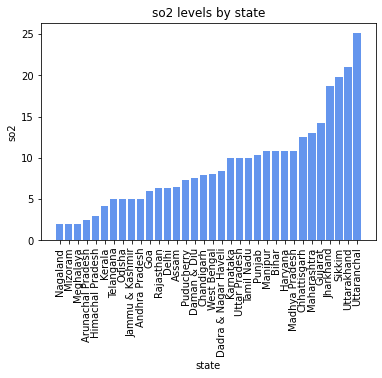

In [ ]:
#b
so2 = df.groupby('state').so2.median().reset_index().sort_values(by= ['so2'])

plt.bar(so2.state, 
        so2.so2, 
        color= 'cornflowerblue')

plt.title('so2 levels by state')
plt.xlabel('state')
plt.xticks(rotation = 90)
plt.ylabel('so2')
plt.show()

The state with the highest levels of so2 is Uttaranchal. The state with the lowest levels of so2 is Nagaland.

### no2 status

In [ ]:
#a
df.groupby('state').no2.agg(['median'])

,median
state,
Andhra Pradesh,20.000000
Arunachal Pradesh,5.000000
Assam,14.000000
Bihar,32.000000
Chandigarh,18.000000
Chhattisgarh,21.500000
Dadra & Nagar Haveli,18.000000
Daman & Diu,17.600000
Delhi,45.000000


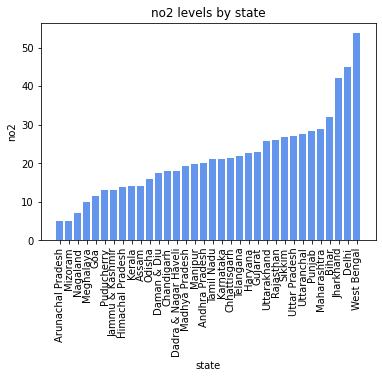

In [ ]:
#b
no2 = df.groupby('state').no2.median().reset_index().sort_values(by= ['no2'])

plt.bar(no2.state, 
        no2.no2, 
        color= 'cornflowerblue')

plt.title('no2 levels by state')
plt.xlabel('state')
plt.xticks(rotation = 90)
plt.ylabel('no2')
plt.show()

The state with the highest levels of no2 is West Bengal. The state with the lowest levels of no2 is Arunachal Pradesh.

### rspm status

In [ ]:
#a
df.groupby('state').rspm.agg(['median'])

,median
state,
Andhra Pradesh,76.000000
Arunachal Pradesh,74.500000
Assam,77.000000
Bihar,108.833091
Chandigarh,90.000000
Chhattisgarh,108.833091
Dadra & Nagar Haveli,91.000000
Daman & Diu,108.833091
Delhi,136.000000


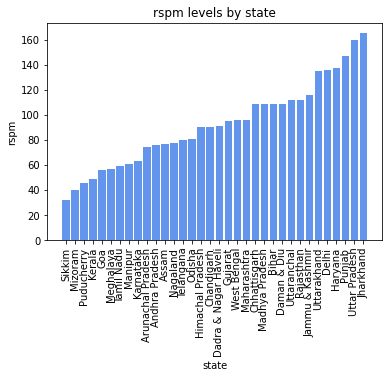

In [ ]:
#b
rspm = df.groupby('state').rspm.median().reset_index().sort_values(by= ['rspm'])

plt.bar(rspm.state, 
        rspm.rspm, 
        color= 'cornflowerblue')

plt.title('rspm levels by state')
plt.xlabel('state')
plt.xticks(rotation = 90)
plt.ylabel('rspm')
plt.show()

The state with the highest levels of rspm is Jharkhand. The state with the lowest levels of rspm is Sikkim.

### spm status

In [ ]:
#a
df.groupby('state').spm.agg(['median'])

,median
state,
Andhra Pradesh,220.78348
Arunachal Pradesh,220.78348
Assam,220.78348
Bihar,220.78348
Chandigarh,220.78348
Chhattisgarh,220.78348
Dadra & Nagar Haveli,220.78348
Daman & Diu,200.50000
Delhi,253.00000


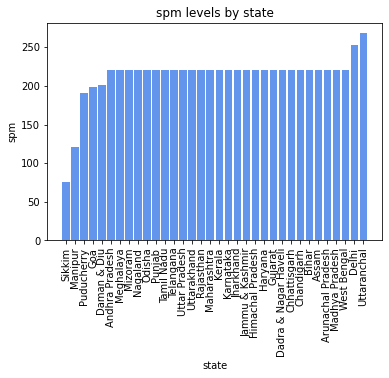

In [ ]:
#b
spm = df.groupby('state').spm.median().reset_index().sort_values(by= ['spm'])

plt.bar(spm.state, 
        spm.spm, 
        color= 'cornflowerblue')

plt.title('spm levels by state')
plt.xlabel('state')
plt.xticks(rotation = 90)
plt.ylabel('spm')
plt.show()

The state with the highest levels of spm is Uttaranchal. The state with the lowest levels of spm is Sikkim.

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [ ]:
#Creating a new datafram contraining data regarding state 'Andhra Pradesh' and groupinng it by 'year'
df2 = df.loc[df.state == 'Andhra Pradesh', ['year','no2','so2','rspm','spm']].groupby(['year']).median()

#Displaying top 5 records
df2.head()

,no2,so2,rspm,spm
year,,,,
1990,13.6,5.60,94.949827,179.00000
1991,12.8,8.25,94.949827,141.50000
1992,27.6,12.40,94.949827,192.00000
1993,11.4,6.00,94.949827,195.67583
1994,14.2,8.70,94.949827,195.67583


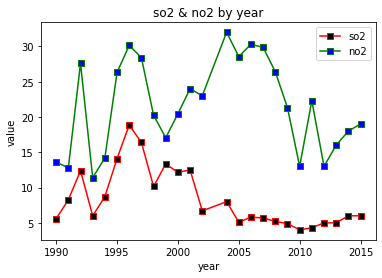

In [ ]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

#a so2 and no2 graph

#line for so2
plt.plot(df2.index, df2.so2, linestyle= '-', marker= 's', markerfacecolor= 'black', color= 'red', label= 'so2')

#line for no2
plt.plot(df2.index, df2.no2, linestyle= '-', marker= 's', markerfacecolor= 'blue', color= 'green', label= 'no2')

plt.legend()
plt.title('so2 & no2 by year')
plt.xlabel('year')
plt.ylabel('value')
plt.show()

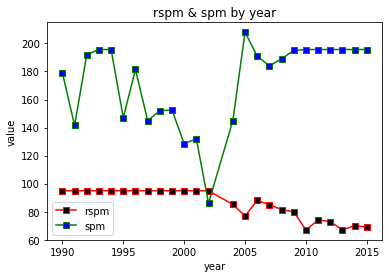

In [ ]:
#b rspm and spm graph

#line for rspm
plt.plot(df2.index, df2.rspm, linestyle= '-', marker= 's', markerfacecolor= 'black', color= 'red', label= 'rspm')

#line for spm
plt.plot(df2.index, df2.spm, linestyle= '-', marker= 's', markerfacecolor= 'blue', color= 'green', label= 'spm')

plt.legend()
plt.title('rspm & spm by year')
plt.xlabel('year')
plt.ylabel('value')
plt.show()

Do you find anything alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



While levels of so2, no2, and rspm appear to be gradually trending downward, the opposite is true for levels of spm. Levels of spm appear to have grown exponentially between the years 2000 to 2005, and have remained extremely high since.